In [45]:
import pandas as pd
import numpy as np
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt
# from sklearn.preprocessing import LabelEncoder



### reading all the csv files and storing into df

### Note
### I have taken only 15 csv files
##### more csv files need more power and time 

In [405]:
import pandas as pd
import glob

df_list = []
for file in glob.glob('*_tracks.csv'):
    df = pd.read_csv(file)
    df_list.append(df)

df_combined = pd.concat(df_list, ignore_index=True)
df = df_combined

# Reset the dataset 

In [406]:
 tracks_df = df

In [407]:
df1 = df

In [408]:
df.isna().any()

frame                 False
id                    False
x                     False
y                     False
width                 False
height                False
xVelocity             False
yVelocity             False
xAcceleration         False
yAcceleration         False
frontSightDistance    False
backSightDistance     False
dhw                   False
thw                   False
ttc                   False
precedingXVelocity    False
precedingId           False
followingId           False
leftPrecedingId       False
leftAlongsideId       False
leftFollowingId       False
rightPrecedingId      False
rightAlongsideId      False
rightFollowingId      False
laneId                False
dtype: bool

In [409]:
df.apply(lambda x: x.isna().all()).value_counts()


False    25
Name: count, dtype: int64

### As we can see we dont have na values so we dont need to apply interpolation

In [410]:
tracks_df

,frame,id,x,y,width,height,xVelocity,yVelocity,xAcceleration,yAcceleration,...,precedingXVelocity,precedingId,followingId,leftPrecedingId,leftAlongsideId,leftFollowingId,rightPrecedingId,rightAlongsideId,rightFollowingId,laneId
0,1,1,362.26,21.68,4.85,2.12,40.85,0.00,0.30,0.00,...,0.00,0,3,0,0,0,0,0,6,5
1,2,1,363.73,21.68,4.85,2.12,40.87,0.00,0.30,0.00,...,0.00,0,14,0,0,0,0,0,6,5
2,3,1,365.27,21.68,4.85,2.12,40.88,0.00,0.31,0.00,...,0.00,0,14,0,0,0,0,0,6,5
3,4,1,366.83,21.68,4.85,2.12,40.89,0.00,0.32,0.00,...,0.00,0,14,0,0,0,0,0,6,5
4,5,1,368.42,21.68,4.85,2.12,40.90,0.01,0.32,0.00,...,0.00,0,14,0,0,0,0,0,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7843019,18085,922,58.98,25.67,6.57,2.22,33.11,-0.03,0.01,0.02,...,33.77,920,0,0,0,0,0,0,0,6
7843020,18086,922,60.30,25.67,6.57,2.22,33.11,-0.03,0.01,0.02,...,33.78,920,0,0,0,0,0,0,0,6
7843021,18087,922,61.62,25.66,6.57,2.22,33.11,-0.03,0.01,0.02,...,33.79,920,0,0,0,0,0,0,0,6
7843022,18088,922,62.94,25.66,6.57,2.22,33.11,-0.03,0.01,0.02,...,33.81,920,0,0,0,0,0,0,0,6


#### removing all the invalid values

In [411]:
tracks_df = tracks_df[
    (tracks_df["yVelocity"].between(0, 2)) &
    (tracks_df["dhw"] > 0) &
    (tracks_df["ttc"].between(0 ,4))
]

In [412]:
tracks_df

,frame,id,x,y,width,height,xVelocity,yVelocity,xAcceleration,yAcceleration,...,precedingXVelocity,precedingId,followingId,leftPrecedingId,leftAlongsideId,leftFollowingId,rightPrecedingId,rightAlongsideId,rightFollowingId,laneId
16362,1331,58,172.11,10.66,4.55,1.92,-35.38,0.66,0.07,0.13,...,-22.37,52,62,57,0,61,0,0,0,2
16363,1332,58,170.70,10.69,4.55,1.92,-35.38,0.66,0.08,0.12,...,-22.37,52,62,57,0,61,0,0,0,2
16364,1333,58,169.29,10.71,4.55,1.92,-35.38,0.67,0.09,0.12,...,-22.37,52,62,57,0,61,0,0,0,2
16365,1334,58,167.87,10.74,4.55,1.92,-35.37,0.67,0.09,0.11,...,-22.37,52,62,57,0,61,0,0,0,2
16366,1335,58,166.46,10.77,4.55,1.92,-35.37,0.68,0.10,0.10,...,-22.37,52,62,57,0,61,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7831922,17632,884,16.70,10.48,4.95,2.02,-26.37,1.41,-0.72,0.53,...,-24.00,881,888,0,0,893,0,0,0,2
7831923,17633,884,15.63,10.54,4.95,2.02,-26.40,1.43,-0.72,0.53,...,-24.00,881,888,0,0,893,0,0,0,2
7831924,17634,884,14.56,10.60,4.95,2.02,-26.43,1.45,-0.72,0.53,...,-23.99,881,888,0,0,893,0,0,0,2
7831925,17635,884,13.49,10.65,4.95,2.02,-26.46,1.47,-0.72,0.52,...,-23.99,881,888,0,0,893,0,0,0,2


In [413]:
tracks_df.describe()

,frame,id,x,y,width,height,xVelocity,yVelocity,xAcceleration,yAcceleration,...,precedingXVelocity,precedingId,followingId,leftPrecedingId,leftAlongsideId,leftFollowingId,rightPrecedingId,rightAlongsideId,rightFollowingId,laneId
count,6215.000000,6215.000000,6215.000000,6215.000000,6215.000000,6215.000000,6215.000000,6215.000000,6215.000000,6215.000000,...,6215.000000,6215.000000,6215.000000,6215.000000,6215.000000,6215.000000,6215.000000,6215.000000,6215.000000,6215.000000
mean,12120.544006,786.378278,214.906629,14.142404,4.785130,1.988034,-27.133780,0.755908,-0.041931,0.086068,...,-21.317675,782.683990,578.134513,529.675141,21.220113,363.474336,393.322446,95.162349,385.772969,2.898471
std,7163.947925,532.038352,110.595999,5.189311,0.899952,0.158896,17.831891,0.415365,0.846112,0.206420,...,14.584898,531.932196,603.828655,561.477770,154.864265,556.806796,540.294432,311.483275,563.678827,1.033626
min,1.000000,4.000000,2.110000,3.690000,2.830000,1.720000,-55.550000,0.000000,-4.310000,-0.430000,...,-39.720000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,6758.500000,374.000000,126.645000,9.890000,4.350000,1.920000,-35.430000,0.500000,-0.510000,-0.050000,...,-26.475000,370.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,11877.000000,745.000000,214.040000,13.870000,4.750000,1.920000,-30.910000,0.850000,-0.150000,0.030000,...,-24.220000,739.000000,446.000000,403.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,17560.500000,1081.000000,315.120000,18.785000,4.950000,2.020000,-27.130000,1.030000,0.170000,0.220000,...,-22.960000,1081.000000,976.000000,878.000000,0.000000,689.000000,780.000000,0.000000,733.000000,3.000000
max,30055.000000,2833.000000,406.840000,33.510000,17.080000,2.630000,45.370000,2.000000,4.200000,0.770000,...,39.920000,2829.000000,2811.000000,2830.000000,2435.000000,2837.000000,2794.000000,2676.000000,2810.000000,7.000000


#### Detecting the Outliers

In [414]:
tracks_df = df

In [415]:
tracks_df = tracks_df[
    (tracks_df["yVelocity"].between(0, 2)) &
    (tracks_df["dhw"] > 0) &
    (tracks_df["ttc"].between(0, 4))
]

In [416]:
tracks_df.describe()

,frame,id,x,y,width,height,xVelocity,yVelocity,xAcceleration,yAcceleration,...,precedingXVelocity,precedingId,followingId,leftPrecedingId,leftAlongsideId,leftFollowingId,rightPrecedingId,rightAlongsideId,rightFollowingId,laneId
count,6215.000000,6215.000000,6215.000000,6215.000000,6215.000000,6215.000000,6215.000000,6215.000000,6215.000000,6215.000000,...,6215.000000,6215.000000,6215.000000,6215.000000,6215.000000,6215.000000,6215.000000,6215.000000,6215.000000,6215.000000
mean,12120.544006,786.378278,214.906629,14.142404,4.785130,1.988034,-27.133780,0.755908,-0.041931,0.086068,...,-21.317675,782.683990,578.134513,529.675141,21.220113,363.474336,393.322446,95.162349,385.772969,2.898471
std,7163.947925,532.038352,110.595999,5.189311,0.899952,0.158896,17.831891,0.415365,0.846112,0.206420,...,14.584898,531.932196,603.828655,561.477770,154.864265,556.806796,540.294432,311.483275,563.678827,1.033626
min,1.000000,4.000000,2.110000,3.690000,2.830000,1.720000,-55.550000,0.000000,-4.310000,-0.430000,...,-39.720000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,6758.500000,374.000000,126.645000,9.890000,4.350000,1.920000,-35.430000,0.500000,-0.510000,-0.050000,...,-26.475000,370.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,11877.000000,745.000000,214.040000,13.870000,4.750000,1.920000,-30.910000,0.850000,-0.150000,0.030000,...,-24.220000,739.000000,446.000000,403.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,17560.500000,1081.000000,315.120000,18.785000,4.950000,2.020000,-27.130000,1.030000,0.170000,0.220000,...,-22.960000,1081.000000,976.000000,878.000000,0.000000,689.000000,780.000000,0.000000,733.000000,3.000000
max,30055.000000,2833.000000,406.840000,33.510000,17.080000,2.630000,45.370000,2.000000,4.200000,0.770000,...,39.920000,2829.000000,2811.000000,2830.000000,2435.000000,2837.000000,2794.000000,2676.000000,2810.000000,7.000000


In [417]:
from scipy.signal import savgol_filter

def smooth_signal(series):
    if len(series) >= 7:
        return savgol_filter(series, 7, 2)
    return series

tracks_df = tracks_df.sort_values(["id", "frame"])

for col in ["yVelocity","dhw"]:
    tracks_df[col] = (
        tracks_df.groupby("id")[col]
        .transform(smooth_signal)
    )


In [418]:
tracks_df

,frame,id,x,y,width,height,xVelocity,yVelocity,xAcceleration,yAcceleration,...,precedingXVelocity,precedingId,followingId,leftPrecedingId,leftAlongsideId,leftFollowingId,rightPrecedingId,rightAlongsideId,rightFollowingId,laneId
3018984,79,4,334.91,20.11,4.45,1.92,40.66,0.150952,1.03,-0.04,...,36.60,3,12,0,0,0,0,5,0,6
3018985,80,4,336.54,20.12,4.45,1.92,40.70,0.150000,1.03,-0.05,...,36.60,3,12,0,0,0,0,5,0,6
3018986,81,4,338.17,20.12,4.45,1.92,40.75,0.148571,1.04,-0.06,...,36.61,3,12,0,0,0,0,5,0,6
3018987,82,4,339.80,20.13,4.45,1.92,40.79,0.146667,1.05,-0.07,...,36.62,3,12,0,0,0,0,5,0,6
3018988,83,4,341.45,20.14,4.45,1.92,40.83,0.144286,1.05,-0.08,...,36.62,3,12,0,0,0,0,5,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7531226,27376,2833,347.25,10.95,4.75,1.92,-27.54,0.939524,0.06,0.01,...,-24.47,2829,0,2830,0,2837,0,0,0,2
7531227,27377,2833,346.15,10.99,4.75,1.92,-27.54,0.940952,0.07,0.00,...,-24.46,2829,0,2830,0,2837,0,0,0,2
7531228,27378,2833,345.01,11.03,4.75,1.92,-27.54,0.941429,0.07,-0.01,...,-24.46,2829,0,2830,0,2837,0,0,0,2
7531229,27379,2833,343.89,11.07,4.75,1.92,-27.54,0.940714,0.07,-0.02,...,-24.46,2829,0,2830,0,2837,0,0,0,2


In [419]:
tracks_df.describe()

,frame,id,x,y,width,height,xVelocity,yVelocity,xAcceleration,yAcceleration,...,precedingXVelocity,precedingId,followingId,leftPrecedingId,leftAlongsideId,leftFollowingId,rightPrecedingId,rightAlongsideId,rightFollowingId,laneId
count,6215.000000,6215.000000,6215.000000,6215.000000,6215.000000,6215.000000,6215.000000,6215.000000,6215.000000,6215.000000,...,6215.000000,6215.000000,6215.000000,6215.000000,6215.000000,6215.000000,6215.000000,6215.000000,6215.000000,6215.000000
mean,12120.544006,786.378278,214.906629,14.142404,4.785130,1.988034,-27.133780,0.755905,-0.041931,0.086068,...,-21.317675,782.683990,578.134513,529.675141,21.220113,363.474336,393.322446,95.162349,385.772969,2.898471
std,7163.947925,532.038352,110.595999,5.189311,0.899952,0.158896,17.831891,0.414895,0.846112,0.206420,...,14.584898,531.932196,603.828655,561.477770,154.864265,556.806796,540.294432,311.483275,563.678827,1.033626
min,1.000000,4.000000,2.110000,3.690000,2.830000,1.720000,-55.550000,-0.116190,-4.310000,-0.430000,...,-39.720000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,6758.500000,374.000000,126.645000,9.890000,4.350000,1.920000,-35.430000,0.501190,-0.510000,-0.050000,...,-26.475000,370.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,11877.000000,745.000000,214.040000,13.870000,4.750000,1.920000,-30.910000,0.853333,-0.150000,0.030000,...,-24.220000,739.000000,446.000000,403.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,17560.500000,1081.000000,315.120000,18.785000,4.950000,2.020000,-27.130000,1.034286,0.170000,0.220000,...,-22.960000,1081.000000,976.000000,878.000000,0.000000,689.000000,780.000000,0.000000,733.000000,3.000000
max,30055.000000,2833.000000,406.840000,33.510000,17.080000,2.630000,45.370000,2.000000,4.200000,0.770000,...,39.920000,2829.000000,2811.000000,2830.000000,2435.000000,2837.000000,2794.000000,2676.000000,2810.000000,7.000000


In [420]:
tracks_df

,frame,id,x,y,width,height,xVelocity,yVelocity,xAcceleration,yAcceleration,...,precedingXVelocity,precedingId,followingId,leftPrecedingId,leftAlongsideId,leftFollowingId,rightPrecedingId,rightAlongsideId,rightFollowingId,laneId
3018984,79,4,334.91,20.11,4.45,1.92,40.66,0.150952,1.03,-0.04,...,36.60,3,12,0,0,0,0,5,0,6
3018985,80,4,336.54,20.12,4.45,1.92,40.70,0.150000,1.03,-0.05,...,36.60,3,12,0,0,0,0,5,0,6
3018986,81,4,338.17,20.12,4.45,1.92,40.75,0.148571,1.04,-0.06,...,36.61,3,12,0,0,0,0,5,0,6
3018987,82,4,339.80,20.13,4.45,1.92,40.79,0.146667,1.05,-0.07,...,36.62,3,12,0,0,0,0,5,0,6
3018988,83,4,341.45,20.14,4.45,1.92,40.83,0.144286,1.05,-0.08,...,36.62,3,12,0,0,0,0,5,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7531226,27376,2833,347.25,10.95,4.75,1.92,-27.54,0.939524,0.06,0.01,...,-24.47,2829,0,2830,0,2837,0,0,0,2
7531227,27377,2833,346.15,10.99,4.75,1.92,-27.54,0.940952,0.07,0.00,...,-24.46,2829,0,2830,0,2837,0,0,0,2
7531228,27378,2833,345.01,11.03,4.75,1.92,-27.54,0.941429,0.07,-0.01,...,-24.46,2829,0,2830,0,2837,0,0,0,2
7531229,27379,2833,343.89,11.07,4.75,1.92,-27.54,0.940714,0.07,-0.02,...,-24.46,2829,0,2830,0,2837,0,0,0,2


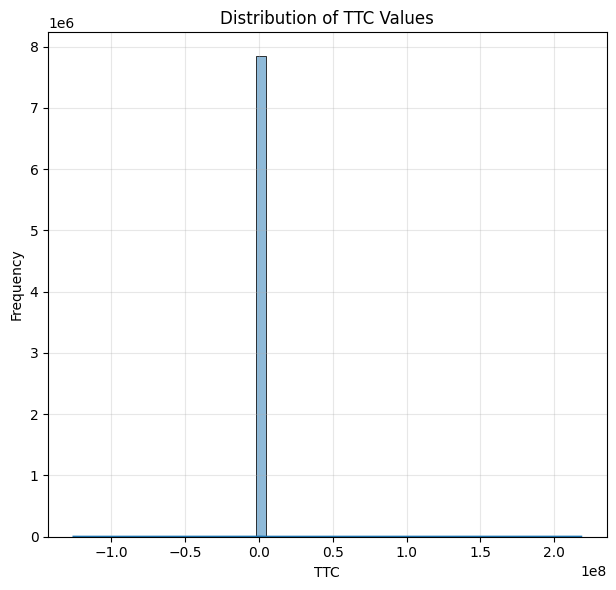

In [421]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Histogram with density curve
plt.subplot(1, 2, 1)
sns.histplot(df['ttc'], kde=True, bins=50)
plt.title('Distribution of TTC Values')
plt.xlabel('TTC')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)



plt.tight_layout()
plt.show()

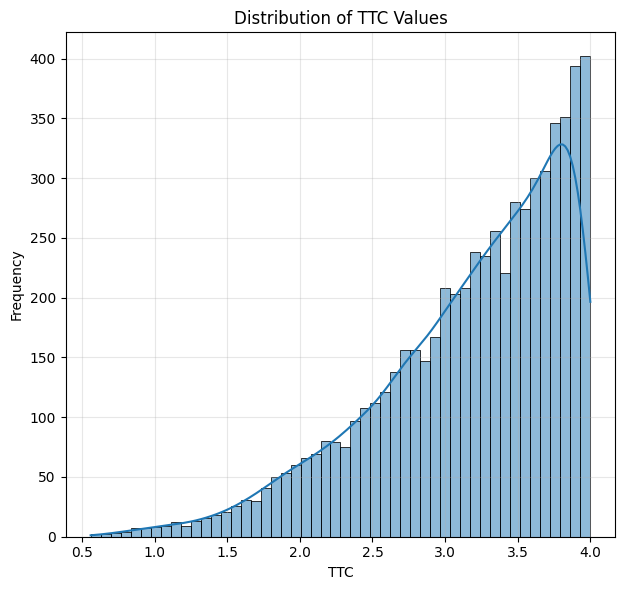

In [422]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Histogram with density curve
plt.subplot(1, 2, 1)
sns.histplot(tracks_df['ttc'], kde=True, bins=50)
plt.title('Distribution of TTC Values')
plt.xlabel('TTC')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)



plt.tight_layout()
plt.show()

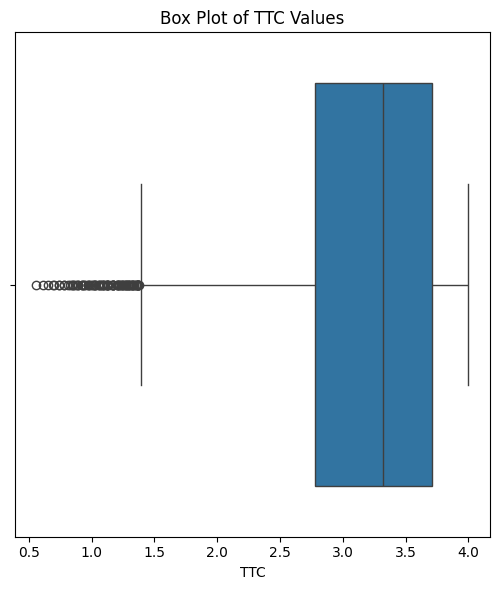

In [423]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=tracks_df['ttc'])
plt.title('Box Plot of TTC Values')
plt.xlabel('TTC')



plt.tight_layout()
plt.show()

#### Synchronisation

In [424]:
tracks_df["time"] = pd.to_timedelta(tracks_df["frame"] / 25.0, unit="s")

tracks_df_syn = (
    tracks_df
    .set_index("time")
    .groupby("id")
    .apply(lambda x: x.resample("40ms").mean())
    .reset_index(level=0, drop=True)
    .reset_index()
)


C:\Users\mofis\AppData\Local\Temp\ipykernel_10292\293669101.py:7: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.resample("40ms").mean())


In [425]:
tracks_df_syn

,time,frame,id,x,y,width,height,xVelocity,yVelocity,xAcceleration,...,precedingXVelocity,precedingId,followingId,leftPrecedingId,leftAlongsideId,leftFollowingId,rightPrecedingId,rightAlongsideId,rightFollowingId,laneId
0,0 days 00:00:03.160000,79.0,4.0,334.91,20.11,4.45,1.92,40.66,0.150952,1.03,...,36.60,3.0,12.0,0.0,0.0,0.0,0.0,5.0,0.0,6.0
1,0 days 00:00:03.200000,80.0,4.0,336.54,20.12,4.45,1.92,40.70,0.150000,1.03,...,36.60,3.0,12.0,0.0,0.0,0.0,0.0,5.0,0.0,6.0
2,0 days 00:00:03.240000,81.0,4.0,338.17,20.12,4.45,1.92,40.75,0.148571,1.04,...,36.61,3.0,12.0,0.0,0.0,0.0,0.0,5.0,0.0,6.0
3,0 days 00:00:03.280000,82.0,4.0,339.80,20.13,4.45,1.92,40.79,0.146667,1.05,...,36.62,3.0,12.0,0.0,0.0,0.0,0.0,5.0,0.0,6.0
4,0 days 00:00:03.320000,83.0,4.0,341.45,20.14,4.45,1.92,40.83,0.144286,1.05,...,36.62,3.0,12.0,0.0,0.0,0.0,0.0,5.0,0.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82178,0 days 00:18:15.040000,27376.0,2833.0,347.25,10.95,4.75,1.92,-27.54,0.939524,0.06,...,-24.47,2829.0,0.0,2830.0,0.0,2837.0,0.0,0.0,0.0,2.0
82179,0 days 00:18:15.080000,27377.0,2833.0,346.15,10.99,4.75,1.92,-27.54,0.940952,0.07,...,-24.46,2829.0,0.0,2830.0,0.0,2837.0,0.0,0.0,0.0,2.0
82180,0 days 00:18:15.120000,27378.0,2833.0,345.01,11.03,4.75,1.92,-27.54,0.941429,0.07,...,-24.46,2829.0,0.0,2830.0,0.0,2837.0,0.0,0.0,0.0,2.0
82181,0 days 00:18:15.160000,27379.0,2833.0,343.89,11.07,4.75,1.92,-27.54,0.940714,0.07,...,-24.46,2829.0,0.0,2830.0,0.0,2837.0,0.0,0.0,0.0,2.0


In [426]:
tracks_df["ttc"].describe()

count    6215.00000
mean        3.17140
std         0.66189
min         0.56000
25%         2.78000
50%         3.32000
75%         3.71000
max         4.00000
Name: ttc, dtype: float64

In [427]:
tracks_df_syn.isna().sum()

time                      0
frame                 75968
id                    75968
x                     75968
y                     75968
width                 75968
height                75968
xVelocity             75968
yVelocity             75968
xAcceleration         75968
yAcceleration         75968
frontSightDistance    75968
backSightDistance     75968
dhw                   75968
thw                   75968
ttc                   75968
precedingXVelocity    75968
precedingId           75968
followingId           75968
leftPrecedingId       75968
leftAlongsideId       75968
leftFollowingId       75968
rightPrecedingId      75968
rightAlongsideId      75968
rightFollowingId      75968
laneId                75968
dtype: int64

In [428]:
tracks_df.isna().sum()

frame                 0
id                    0
x                     0
y                     0
width                 0
height                0
xVelocity             0
yVelocity             0
xAcceleration         0
yAcceleration         0
frontSightDistance    0
backSightDistance     0
dhw                   0
thw                   0
ttc                   0
precedingXVelocity    0
precedingId           0
followingId           0
leftPrecedingId       0
leftAlongsideId       0
leftFollowingId       0
rightPrecedingId      0
rightAlongsideId      0
rightFollowingId      0
laneId                0
time                  0
dtype: int64

## Interpolation after synchronization
##### We have (na) value 
##### Now we have to do interpolation

In [429]:
df= tracks_df_syn

In [431]:
df[["id","frame","xVelocity", "yVelocity",
    "xAcceleration", "yAcceleration",
    "dhw", "thw", "ttc"]] = tracks_df_syn[["id","frame","xVelocity", "yVelocity",
    "xAcceleration", "yAcceleration",
    "dhw", "thw", "ttc"]].interpolate(method='linear')

In [434]:
df.isna().sum()

time                      0
frame                     0
id                        0
x                     75968
y                     75968
width                 75968
height                75968
xVelocity                 0
yVelocity                 0
xAcceleration             0
yAcceleration             0
frontSightDistance    75968
backSightDistance     75968
dhw                       0
thw                       0
ttc                       0
precedingXVelocity    75968
precedingId           75968
followingId           75968
leftPrecedingId       75968
leftAlongsideId       75968
leftFollowingId       75968
rightPrecedingId      75968
rightAlongsideId      75968
rightFollowingId      75968
laneId                75968
dtype: int64

In [435]:
df['ttc'].describe()


count    82183.000000
mean         3.166365
std          0.649992
min          0.560000
25%          2.757242
50%          3.301994
75%          3.709975
max          4.000000
Name: ttc, dtype: float64

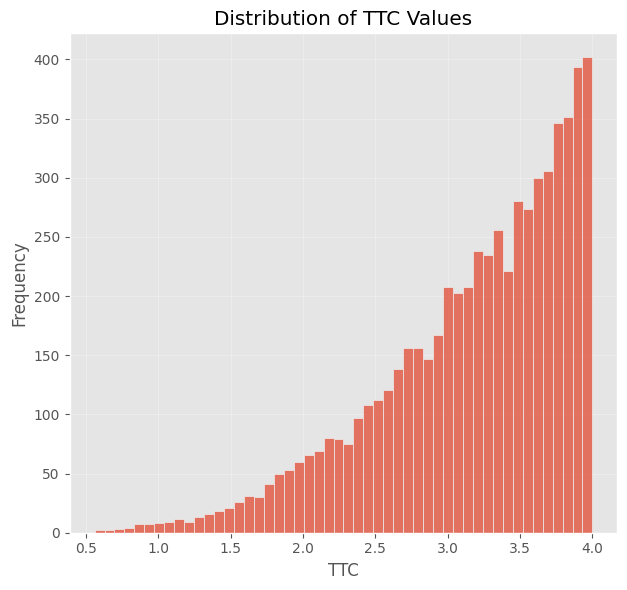

In [498]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Histogram with density curve
plt.subplot(1, 2, 1)
sns.histplot(tracks_df['ttc'], kde=False, bins=50)
plt.title('Distribution of TTC Values')
plt.xlabel('TTC')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)



plt.tight_layout()
plt.show()

#### Learning

# Feature Engineering & Exploration Analyse

#### Feature Selection

In [437]:
df.isna().any()

time                  False
frame                 False
id                    False
x                      True
y                      True
width                  True
height                 True
xVelocity             False
yVelocity             False
xAcceleration         False
yAcceleration         False
frontSightDistance     True
backSightDistance      True
dhw                   False
thw                   False
ttc                   False
precedingXVelocity     True
precedingId            True
followingId            True
leftPrecedingId        True
leftAlongsideId        True
leftFollowingId        True
rightPrecedingId       True
rightAlongsideId       True
rightFollowingId       True
laneId                 True
dtype: bool

In [438]:
feature_cols = ['dhw','ttc','yVelocity']

In [439]:
feature_df = df

### Statistical Features

In [440]:
stat_features = ( df.groupby('id')[feature_cols].agg(["mean","var","std"]))

In [441]:
stat_features.columns = [ f"{col}_{stat}" for col, stat in stat_features.columns]

In [442]:
stat_features.columns

Index(['dhw_mean', 'dhw_var', 'dhw_std', 'ttc_mean', 'ttc_var', 'ttc_std',
       'yVelocity_mean', 'yVelocity_var', 'yVelocity_std'],
      dtype='object')

#### Dynamic Features

###### Beschleunigungsgradienten, Spurwechselübergänge, TTC-Abletungen

#### ttc Derivative

In [443]:
df_ttc = df.sort_values(["id", "frame"])

df_ttc["ttc_derivative"] = (
    df.groupby("id")["ttc"]
    .diff()
)


In [444]:
df_ttc

,time,frame,id,x,y,width,height,xVelocity,yVelocity,xAcceleration,...,precedingId,followingId,leftPrecedingId,leftAlongsideId,leftFollowingId,rightPrecedingId,rightAlongsideId,rightFollowingId,laneId,ttc_derivative
0,0 days 00:00:03.160000,79.0,4.0,334.91,20.11,4.45,1.92,40.66,0.150952,1.03,...,3.0,12.0,0.0,0.0,0.0,0.0,5.0,0.0,6.0,NaN
1,0 days 00:00:03.200000,80.0,4.0,336.54,20.12,4.45,1.92,40.70,0.150000,1.03,...,3.0,12.0,0.0,0.0,0.0,0.0,5.0,0.0,6.0,-0.07
2,0 days 00:00:03.240000,81.0,4.0,338.17,20.12,4.45,1.92,40.75,0.148571,1.04,...,3.0,12.0,0.0,0.0,0.0,0.0,5.0,0.0,6.0,-0.08
3,0 days 00:00:03.280000,82.0,4.0,339.80,20.13,4.45,1.92,40.79,0.146667,1.05,...,3.0,12.0,0.0,0.0,0.0,0.0,5.0,0.0,6.0,-0.07
4,0 days 00:00:03.320000,83.0,4.0,341.45,20.14,4.45,1.92,40.83,0.144286,1.05,...,3.0,12.0,0.0,0.0,0.0,0.0,5.0,0.0,6.0,-0.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82178,0 days 00:18:15.040000,27376.0,2833.0,347.25,10.95,4.75,1.92,-27.54,0.939524,0.06,...,2829.0,0.0,2830.0,0.0,2837.0,0.0,0.0,0.0,2.0,-0.04
82179,0 days 00:18:15.080000,27377.0,2833.0,346.15,10.99,4.75,1.92,-27.54,0.940952,0.07,...,2829.0,0.0,2830.0,0.0,2837.0,0.0,0.0,0.0,2.0,-0.04
82180,0 days 00:18:15.120000,27378.0,2833.0,345.01,11.03,4.75,1.92,-27.54,0.941429,0.07,...,2829.0,0.0,2830.0,0.0,2837.0,0.0,0.0,0.0,2.0,-0.05
82181,0 days 00:18:15.160000,27379.0,2833.0,343.89,11.07,4.75,1.92,-27.54,0.940714,0.07,...,2829.0,0.0,2830.0,0.0,2837.0,0.0,0.0,0.0,2.0,-0.05


#### Lateral Motion Intensity (Spurwechselindikator)

In [449]:
df_ttc["lane_motion_intensity"] = (
    df_ttc.groupby("id")["yVelocity"]
    .apply(lambda x: x.abs().mean())
)


#### Dynamic Feature Aggregation 

In [452]:
dynamic_features = (
    df_ttc
    .groupby("id")[["ttc_derivative", "yVelocity","dhw"]]
    .agg(["mean", "std"])
)

dynamic_features.columns = [
    f"{col}_{stat}" for col, stat in dynamic_features.columns
]


In [453]:
dynamic_features

,ttc_derivative_mean,ttc_derivative_std,yVelocity_mean,yVelocity_std,dhw_mean,dhw_std
id,,,,,,
4.0,-0.068235,0.007276,0.117672,0.029507,14.624392,0.948314
8.0,-0.040000,0.000000,1.236667,0.012111,17.680000,0.726994
11.0,-0.100000,NaN,0.080000,0.000000,7.005000,0.035355
17.0,-0.043800,0.004903,0.798805,0.294098,25.710784,5.275916
19.0,-0.006474,0.025876,0.657432,0.041698,17.842949,1.436514
...,...,...,...,...,...,...
2682.0,-0.043462,0.004852,0.025891,0.020696,16.675891,1.759096
2701.0,NaN,NaN,0.930000,NaN,19.940000,NaN
2742.0,-0.041667,0.004082,1.131429,0.013184,30.992857,0.698255


### Behavioral Features
###### defensive / normal / aggressive driving|

###### | Behavior   | Condition           
| Defensive ---- High DHW & high TTC 
| Normal    ---- Medium DHW & TTC    
| Aggressive --- Low DHW or low TTC  


In [455]:
df_behave = df

In [456]:
df_behave

,time,frame,id,x,y,width,height,xVelocity,yVelocity,xAcceleration,...,precedingXVelocity,precedingId,followingId,leftPrecedingId,leftAlongsideId,leftFollowingId,rightPrecedingId,rightAlongsideId,rightFollowingId,laneId
0,0 days 00:00:03.160000,79.0,4.0,334.91,20.11,4.45,1.92,40.66,0.150952,1.03,...,36.60,3.0,12.0,0.0,0.0,0.0,0.0,5.0,0.0,6.0
1,0 days 00:00:03.200000,80.0,4.0,336.54,20.12,4.45,1.92,40.70,0.150000,1.03,...,36.60,3.0,12.0,0.0,0.0,0.0,0.0,5.0,0.0,6.0
2,0 days 00:00:03.240000,81.0,4.0,338.17,20.12,4.45,1.92,40.75,0.148571,1.04,...,36.61,3.0,12.0,0.0,0.0,0.0,0.0,5.0,0.0,6.0
3,0 days 00:00:03.280000,82.0,4.0,339.80,20.13,4.45,1.92,40.79,0.146667,1.05,...,36.62,3.0,12.0,0.0,0.0,0.0,0.0,5.0,0.0,6.0
4,0 days 00:00:03.320000,83.0,4.0,341.45,20.14,4.45,1.92,40.83,0.144286,1.05,...,36.62,3.0,12.0,0.0,0.0,0.0,0.0,5.0,0.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82178,0 days 00:18:15.040000,27376.0,2833.0,347.25,10.95,4.75,1.92,-27.54,0.939524,0.06,...,-24.47,2829.0,0.0,2830.0,0.0,2837.0,0.0,0.0,0.0,2.0
82179,0 days 00:18:15.080000,27377.0,2833.0,346.15,10.99,4.75,1.92,-27.54,0.940952,0.07,...,-24.46,2829.0,0.0,2830.0,0.0,2837.0,0.0,0.0,0.0,2.0
82180,0 days 00:18:15.120000,27378.0,2833.0,345.01,11.03,4.75,1.92,-27.54,0.941429,0.07,...,-24.46,2829.0,0.0,2830.0,0.0,2837.0,0.0,0.0,0.0,2.0
82181,0 days 00:18:15.160000,27379.0,2833.0,343.89,11.07,4.75,1.92,-27.54,0.940714,0.07,...,-24.46,2829.0,0.0,2830.0,0.0,2837.0,0.0,0.0,0.0,2.0


In [457]:
dhw_q = df_behave["dhw"].quantile([0.33, 0.66])
ttc_q = df_behave["ttc"].quantile([0.33, 0.66])


In [458]:
def classify_behavior(row):
    if row["dhw"] > dhw_q[0.66] and row["ttc"] > ttc_q[0.66]:
        return "defensive"
    elif row["dhw"] < dhw_q[0.33] or row["ttc"] < ttc_q[0.33]:
        return "aggressive"
    return "normal"

df_behave["driving_style"] = df_behave.apply(classify_behavior, axis=1)


In [459]:
df_behave

,time,frame,id,x,y,width,height,xVelocity,yVelocity,xAcceleration,...,precedingId,followingId,leftPrecedingId,leftAlongsideId,leftFollowingId,rightPrecedingId,rightAlongsideId,rightFollowingId,laneId,driving_style
0,0 days 00:00:03.160000,79.0,4.0,334.91,20.11,4.45,1.92,40.66,0.150952,1.03,...,3.0,12.0,0.0,0.0,0.0,0.0,5.0,0.0,6.0,normal
1,0 days 00:00:03.200000,80.0,4.0,336.54,20.12,4.45,1.92,40.70,0.150000,1.03,...,3.0,12.0,0.0,0.0,0.0,0.0,5.0,0.0,6.0,normal
2,0 days 00:00:03.240000,81.0,4.0,338.17,20.12,4.45,1.92,40.75,0.148571,1.04,...,3.0,12.0,0.0,0.0,0.0,0.0,5.0,0.0,6.0,normal
3,0 days 00:00:03.280000,82.0,4.0,339.80,20.13,4.45,1.92,40.79,0.146667,1.05,...,3.0,12.0,0.0,0.0,0.0,0.0,5.0,0.0,6.0,normal
4,0 days 00:00:03.320000,83.0,4.0,341.45,20.14,4.45,1.92,40.83,0.144286,1.05,...,3.0,12.0,0.0,0.0,0.0,0.0,5.0,0.0,6.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82178,0 days 00:18:15.040000,27376.0,2833.0,347.25,10.95,4.75,1.92,-27.54,0.939524,0.06,...,2829.0,0.0,2830.0,0.0,2837.0,0.0,0.0,0.0,2.0,aggressive
82179,0 days 00:18:15.080000,27377.0,2833.0,346.15,10.99,4.75,1.92,-27.54,0.940952,0.07,...,2829.0,0.0,2830.0,0.0,2837.0,0.0,0.0,0.0,2.0,aggressive
82180,0 days 00:18:15.120000,27378.0,2833.0,345.01,11.03,4.75,1.92,-27.54,0.941429,0.07,...,2829.0,0.0,2830.0,0.0,2837.0,0.0,0.0,0.0,2.0,aggressive
82181,0 days 00:18:15.160000,27379.0,2833.0,343.89,11.07,4.75,1.92,-27.54,0.940714,0.07,...,2829.0,0.0,2830.0,0.0,2837.0,0.0,0.0,0.0,2.0,aggressive



## unable to install sklearn

In [463]:
!pip install scikit-learn


In [465]:
import sklearn
print(sklearn.__version__)


ModuleNotFoundError: No module named 'sklearn'


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
tracks_df["driving_style_label"] = le.fit_transform(tracks_df["driving_style"])


### / Alternative

In [466]:
df_behave["driving_style_label"] = (
    df_behave["driving_style"]
    .astype("category")
    .cat.codes
)


### Causal Analysis

In [467]:
causal_corr = df_behave[
    [ "dhw","ttc","yVelocity","driving_style_label"]
    ].corr()["driving_style_label"]
print(causal_corr)

dhw                    0.320570
ttc                    0.568643
yVelocity             -0.086681
driving_style_label    1.000000
Name: driving_style_label, dtype: float64


### Visualizations

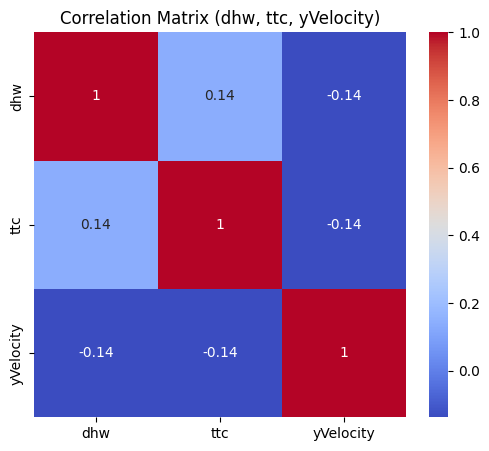

In [471]:

corr_matrix = df_behave[feature_cols].corr()

plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix (dhw, ttc, yVelocity)")
plt.show()


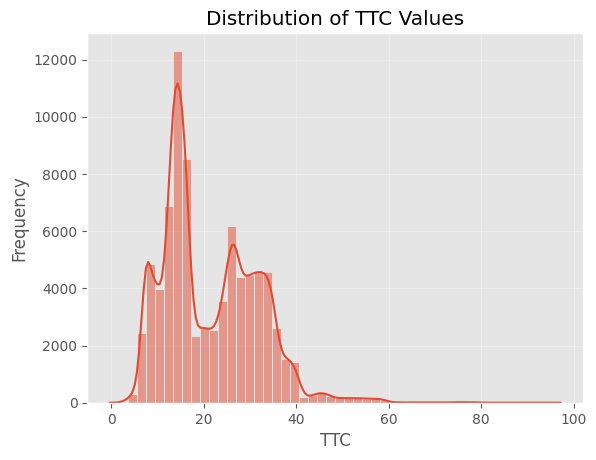

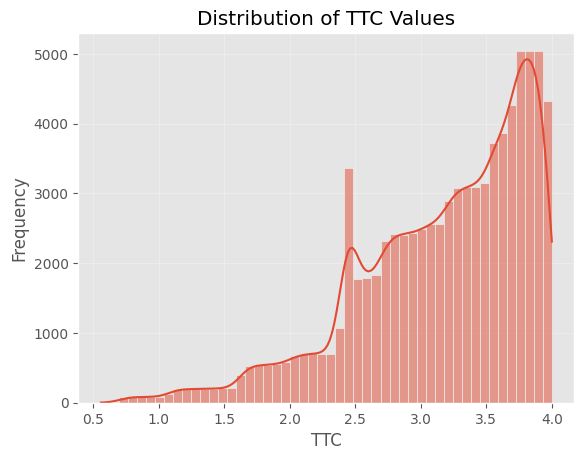

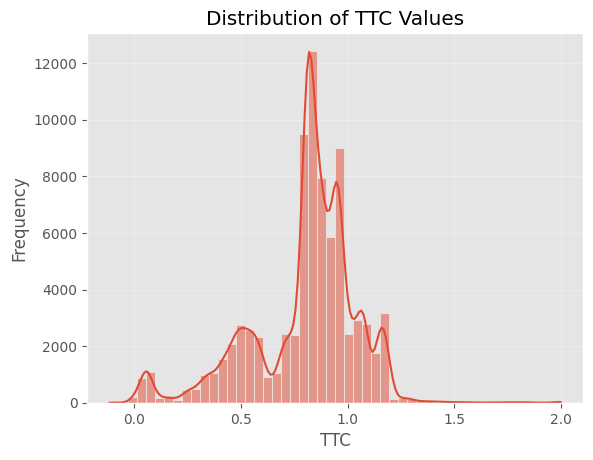

In [502]:
for col in feature_cols:
    plt.figure()
    sns.histplot(df_behave[col], kde=True, bins=50)
    plt.title('Distribution of TTC Values')
    plt.xlabel('TTC')
    plt.ylabel('Frequency')
    plt.grid(True, alpha=0.3)
    plt.show()

In [473]:
dfd = (
    df_behave
    .groupby("id")
    .agg(
        Distance=("dhw", "mean"),
        lat_vel=("yVelocity", "mean"),
        minTTC=("ttc", "min")
    )
    .reset_index()
)


In [477]:
dfd

,id,Distance,lat_vel,minTTC,crash
0,4.0,14.624392,0.117672,2.78,False
1,8.0,17.680000,1.236667,1.65,False
2,11.0,7.005000,0.080000,3.88,False
3,17.0,25.710784,0.798805,1.80,False
4,19.0,17.842949,0.657432,2.60,False
...,...,...,...,...,...
260,2682.0,16.675891,0.025891,2.39,False
261,2701.0,19.940000,0.930000,4.00,False
262,2742.0,30.992857,1.131429,3.74,False
263,2804.0,10.424062,0.995994,2.96,False


In [474]:
dfd["crash"] = dfd["minTTC"] < 1.5


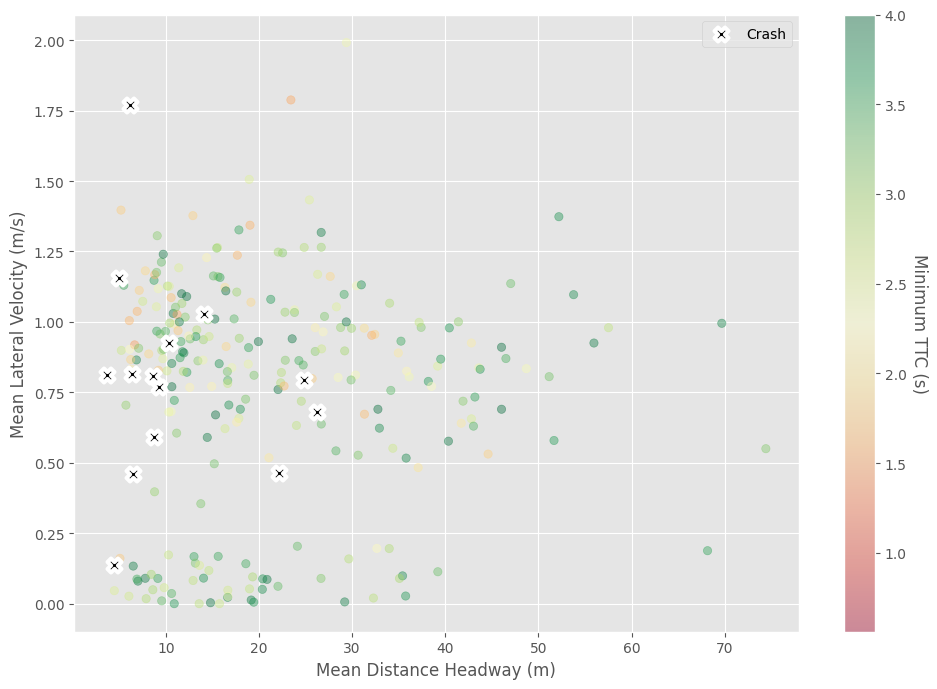

In [476]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt

plt.style.use("ggplot")

fig, ax = plt.subplots(figsize=(10, 7))

scatter = ax.scatter(
    dfd["Distance"],
    dfd["lat_vel"],
    c=dfd["minTTC"],
    cmap=cm.RdYlGn,
    alpha=0.4
)

# Mark the crash
crash_df = dfd[dfd["crash"]]

ax.scatter(
    crash_df["Distance"],
    crash_df["lat_vel"],
    c="black",
    marker="X",
    s=100,
    linewidths=3,
    label="Crash",
    zorder=10,
    edgecolors="white"
)

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label("Minimum TTC (s)", rotation=270, labelpad=15)

ax.set_xlabel("Mean Distance Headway (m)")
ax.set_ylabel("Mean Lateral Velocity (m/s)")
ax.legend()

plt.tight_layout()
plt.show()


In [484]:
feature_matrix = stat_features.join(dynamic_features)

feature_matrix["style_label"] = (
    tracks_df.groupby("id")["style_label"].first()
)

feature_matrix.to_csv("feature_matrix.csv")


ValueError: columns overlap but no suffix specified: Index(['dhw_mean', 'dhw_std', 'yVelocity_mean', 'yVelocity_std'], dtype='object')

In [485]:
dynamic_features = dynamic_features.rename(
    columns=lambda x: f"dyn_{x}"
)


In [486]:
feature_matrix = stat_features.join(dynamic_features)


In [489]:
df_behave

,time,frame,id,x,y,width,height,xVelocity,yVelocity,xAcceleration,...,followingId,leftPrecedingId,leftAlongsideId,leftFollowingId,rightPrecedingId,rightAlongsideId,rightFollowingId,laneId,driving_style,driving_style_label
0,0 days 00:00:03.160000,79.0,4.0,334.91,20.11,4.45,1.92,40.66,0.150952,1.03,...,12.0,0.0,0.0,0.0,0.0,5.0,0.0,6.0,normal,2
1,0 days 00:00:03.200000,80.0,4.0,336.54,20.12,4.45,1.92,40.70,0.150000,1.03,...,12.0,0.0,0.0,0.0,0.0,5.0,0.0,6.0,normal,2
2,0 days 00:00:03.240000,81.0,4.0,338.17,20.12,4.45,1.92,40.75,0.148571,1.04,...,12.0,0.0,0.0,0.0,0.0,5.0,0.0,6.0,normal,2
3,0 days 00:00:03.280000,82.0,4.0,339.80,20.13,4.45,1.92,40.79,0.146667,1.05,...,12.0,0.0,0.0,0.0,0.0,5.0,0.0,6.0,normal,2
4,0 days 00:00:03.320000,83.0,4.0,341.45,20.14,4.45,1.92,40.83,0.144286,1.05,...,12.0,0.0,0.0,0.0,0.0,5.0,0.0,6.0,normal,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82178,0 days 00:18:15.040000,27376.0,2833.0,347.25,10.95,4.75,1.92,-27.54,0.939524,0.06,...,0.0,2830.0,0.0,2837.0,0.0,0.0,0.0,2.0,aggressive,0
82179,0 days 00:18:15.080000,27377.0,2833.0,346.15,10.99,4.75,1.92,-27.54,0.940952,0.07,...,0.0,2830.0,0.0,2837.0,0.0,0.0,0.0,2.0,aggressive,0
82180,0 days 00:18:15.120000,27378.0,2833.0,345.01,11.03,4.75,1.92,-27.54,0.941429,0.07,...,0.0,2830.0,0.0,2837.0,0.0,0.0,0.0,2.0,aggressive,0
82181,0 days 00:18:15.160000,27379.0,2833.0,343.89,11.07,4.75,1.92,-27.54,0.940714,0.07,...,0.0,2830.0,0.0,2837.0,0.0,0.0,0.0,2.0,aggressive,0


In [491]:
feature_matrix["style_label"] = (
    df_behave.groupby("id")["driving_style_label"].first()
)


In [492]:
feature_matrix.to_csv("feature_matrix.csv")


# Modellierung

### Modellierung in file 2